# Prediction of fruits

In [1]:
import numpy as np
import pandas as pd

## 1) Import and explore data

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.shape

(59, 7)

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# Check if there is any missing data
Null = fruits.isnull().sum()
Null[Null>0]

Series([], dtype: int64)

In [5]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

lookup_fruit_name = dict(zip(fruits.fruit_label,fruits.fruit_name))
target_names_fruits = list(lookup_fruit_name.values())
target_names_fruits

['apple', 'mandarin', 'orange', 'lemon']

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


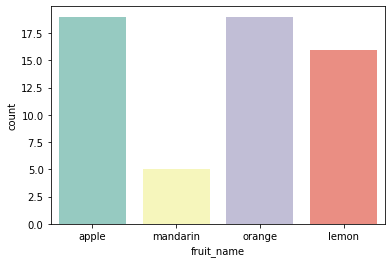

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(fruits['fruit_name'], label="Count", palette="Set3")
plt.show()

## 2) Normalization

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set as well 
X_test_scaled = scaler.transform(X_test)

## 3) Train the ML model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

knn.predict(X_test_scaled)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


## 4) Unseen data

In [43]:
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]])

Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## 5) Plotting the decision boundary

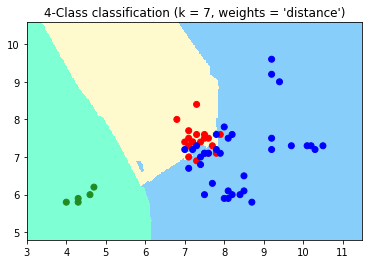

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets

# Here, I only take the first two features: height and width
X = X_fruits.iloc[:,0:2].to_numpy()
y = y_fruits.to_numpy()
h = .02  # step size in the mesh

n_neighbors = 7

# Create color maps
cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
plt.savefig('classification chart')